In [10]:
import json
import pandas as pd
import numpy as np


In [41]:
data = json.load(open("../data/facemesh_test_data.json",'r'))
len(data)


501

In [42]:
df = pd.DataFrame(data.values())

In [43]:
df

landmarks  \
0    [0.47063323855400085, 0.569893479347229, -0.02...   
1    [0.471161425113678, 0.5699657201766968, -0.028...   
2    [0.4692474901676178, 0.5708968043327332, -0.02...   
3    [0.46871352195739746, 0.5704047083854675, -0.0...   
4    [0.47170859575271606, 0.5708374977111816, -0.0...   
..                                                 ...   
496  [0.4566347599029541, 0.6397868990898132, -0.01...   
497  [0.45739737153053284, 0.640773355960846, -0.01...   
498  [0.45959576964378357, 0.6344872713088989, -0.0...   
499  [0.46066662669181824, 0.6304833292961121, -0.0...   
500  [0.4615309536457062, 0.6351388692855835, -0.01...   

                                                  look  \
0    [-0.009123426756509349, 0.00857293248054489, 0...   
1    [-0.007652320899346313, 0.007080343293076814, ...   
2    [-0.0034936776521366066, 0.002700949754205675,...   
3    [-0.003751334238200386, 0.002986272249694783, ...   
4    [-0.006577391076472662, 0.005767793354813516, ...   
..                                                 ...   
496  [0.08528726463717698, -0.07488931754544606, 0....   
497  [0.08149737528342942, -0.07161931109476065, 0....   
498  [0.0776075170713807, -0.06858808458362427, 0.9...   
499  [0.0658275737797623, -0.0581787491672878, 0.99...   
500  [0.07483632685844449, -0.06561033079816518, 0....   

                                             nose_look  \
0    [0.31210978577325116, -0.20999932539743157, 0....   
1    [0.31621059124279516, -0.2132839926338721, 0.9...   
2    [0.32139195101049356, -0.21918092057535626, 0....   
3    [0.32164670523839317, -0.21879021270699445, 0....   
4    [0.31417038612727044, -0.21064778164014814, 0....   
..                                                 ...   
496  [0.4627980209644004, -0.3051323514456534, 0.83...   
497  [0.46341616736911906, -0.3043489944815569, 0.8...   
498  [0.4568334086716742, -0.3017192139215875, 0.83...   
499  [0.44342387326740157, -0.28939959379619445, 0....   
500  [0.4475529311538452, -0.29128849705471915, 0.8...   

                                             iris_look  looking_at  \
0    [-0.18792785271324688, -0.07222885626058519, 0...  [0.5, 1.0]   
1    [-0.18206710819971253, -0.006877150777745055, ...  [0.5, 1.0]   
2    [-0.15475419863712916, 0.02063734223543839, 0....  [0.5, 1.0]   
3    [-0.15900653163842557, -0.003935357009857585, ...  [0.5, 1.0]   
4    [-0.13135853575120404, 0.04842882900418637, 0....  [0.5, 1.0]   
..                                                 ...         ...   
496  [-0.06906543702006247, 0.19038364244279113, 0....  [0.5, 1.0]   
497  [-0.030128908133029805, 0.19036050818207823, 0...  [0.5, 1.0]   
498  [0.05207808904101509, 0.18269199796047653, 0.4...  [0.5, 1.0]   
499  [-0.00446654482236721, 0.13276375073800176, 0....  [0.5, 1.0]   
500  [-0.03980622290503969, 0.14991150089310615, 0....  [0.5, 1.0]   

     eye_nose_ratio  eye_nose_chin_ratio  is_blink  quadrant  
0          0.025487             0.054125         0         1  
1          0.018403             0.059477         0         1  
2          0.005412             0.070267         0         1  
3          0.012327             0.064758         0         1  
4         -0.005183             0.054305         0         1  
..              ...                  ...       ...       ...  
496        0.134645             0.447291         0         0  
497        0.115340             0.445546         0         0  
498        0.071052             0.439449         0         0  
499        0.098912             0.401730         0         0  
500        0.190229             0.412879         0         0  

[501 rows x 9 columns]

In [44]:
x = np.array(df.landmarks.values.tolist())
y = np.array(df.quadrant.values.tolist())
print(np.shape(x),np.shape(y))


(501, 1434) (501,)


In [45]:
from sklearn.model_selection import train_test_split

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

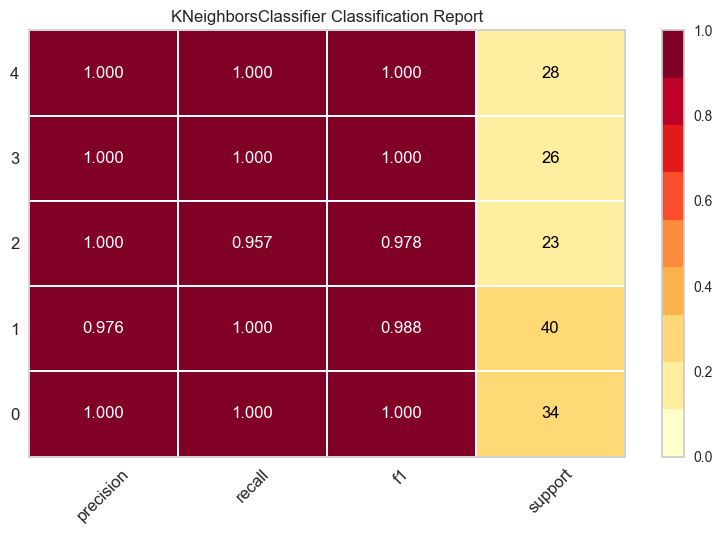

<AxesSubplot: title={'center': 'KNeighborsClassifier Classification Report'}>

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassificationReport, ROCAUC
from yellowbrick.datasets import load_credit


# Instantiate the classification model and visualizer
visualizer = ClassificationReport(
    KNeighborsClassifier(n_neighbors=5), classes=[0,1,2,3,4], support=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()


In [34]:
from sklearn.linear_model import SGDClassifier


model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict class labels on a test data
pred_labels_te = model.predict(X_test)


print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9933774834437086
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.98      1.00      0.99        40
           2       1.00      0.96      0.98        23
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        28

    accuracy                           0.99       151
   macro avg       1.00      0.99      0.99       151
weighted avg       0.99      0.99      0.99       151

--------------------------------------------------------



In [36]:
from joblib import dump, load
dump(model,"../models/knn_model_latest.joblib")

['../models/knn_model_latest.joblib']

In [47]:
def train(file_path):
    
    data = json.load(open(file_path, 'r'))
    df = pd.DataFrame(data.values())
    x = np.array(df.landmarks.values.tolist())
    y = np.array(df.quadrant.values.tolist())
    print(np.shape(x),np.shape(y))

    # Create the train and test data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels_te = model.predict(X_test)


    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(X_test, y_test)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    return model

new_model = preprocess_data("../data/facemesh_data_martin_2023-02-17_1676625001.613462.json", model)

(501, 1434) (501,)
*************** Evaluation on Test Data ***************
Accuracy Score:  0.9933774834437086
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        40
           2       0.96      1.00      0.98        23
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        28

    accuracy                           0.99       151
   macro avg       0.99      0.99      0.99       151
weighted avg       0.99      0.99      0.99       151

--------------------------------------------------------



In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict class labels on a test data
pred_labels_te = model.predict(x)


print('*************** Evaluation on Test Data ***************')
score_te = model.score(x, y)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y, pred_labels_te))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.1996007984031936
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00       100
           3       0.20      1.00      0.33       100
           4       0.00      0.00      0.00       100

    accuracy                           0.20       501
   macro avg       0.04      0.20      0.07       501
weighted avg       0.04      0.20      0.07       501

--------------------------------------------------------



/Users/sidkas/workspace/advancedengineering2023/ae2023/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sidkas/workspace/advancedengineering2023/ae2023/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sidkas/workspace/advancedengineering2023/ae2023/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [51]:
def test(path, model):
    data = json.load(open(path, 'r'))
    df = pd.DataFrame(data.values())
    x = np.array(df.landmarks.values.tolist())
    y = np.array(df.quadrant.values.tolist())
    print(np.shape(x),np.shape(y))


    # model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels_te = model.predict(x)


    print('*************** Evaluation on Test Data ***************')
    score_te = model.score(x, y)
    print('Accuracy Score: ', score_te)
    # Look at classification report to evaluate the model
    print(classification_report(y, pred_labels_te))
    print('--------------------------------------------------------')
    print("")

    return model

preprocess_data("../data/facemesh_data_martin_2023-02-17_1676625321.5758731.json", new_model)

(501, 1434) (501,)
*************** Evaluation on Test Data ***************
Accuracy Score:  0.9470198675496688
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.97      0.97      0.97        40
           2       0.96      0.96      0.96        23
           3       0.93      1.00      0.96        26
           4       0.89      0.89      0.89        28

    accuracy                           0.95       151
   macro avg       0.94      0.95      0.95       151
weighted avg       0.95      0.95      0.95       151

--------------------------------------------------------



KNeighborsClassifier()